In [1]:
import csv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

## Phishing Data Set

In [2]:
# 1 ID
# 2 having_IP_Address {binary: "1" - URL includes IP address, "-1" - address does not include IP address}
## 3 URL_Length {ordinal: 1, 0, -1} # need explanation
# 4 Shorting_Service [sic]{binary: "1" - uses shortening service, "-1" - otherwise}
# 5 having_At_Symbol {binary: "1" - URL contains @, "-1" - otherwise}
# 6 double_slash_redirecting {binary; "1" - yes, URL contains "//" to redirect from original link, "-1" - no} 
# 7 Prefix_Suffix {binary: "1" - yes, URL has prefix or suffix to obfuscate suspicious URL, "-1" - no} 
## 8 having_Sub_Domain {ordinal: "-1", "0", "1"} # need explanation
## 9 SSLfinal_State  {ordinal: "-1", "0", "1"} # need explanation
# 10 Domain_registeration_length {binary: "-1" - domain expires on <= 1 year, "1" - otherwise} 
# 11 Favicon {binary: "1" - favicon loaded from external domain, "-1" - otherwise}
# 12 port {binary: "1" - port # is of the preferred status (open or closed), "-1" - otherwise}
# 13 HTTPS_token {binary: "1" - "https" appears within the domain portion of the URL, "-1" - otherwise}
# 14 Request_URL {binary: "1" - external objects of a webpage are loaded from another domain, "-1" - otherwise}
## 15 URL_of_Anchor {ordinal "-1", "0", "1" } # need explanation
## 16 Links_in_tags { 1,-1,0 } # need explanation
## 17 SFH  { -1,1,0 } # need explanation
# 18 Submitting_to_email {binary: "1" - using "mail()" or "mailto:" function to submit user info, "-1" - otherwise}
# 19 Abnormal_URL {binary: "1" - host name is not included in URL, "-1" - otherwise}
# 20 Redirect  {binary: "1" - # redirect <= 1, "0" - otherwise}
# 21 on_mouseover  {binary: "1" - onMouseOver changes status bar,"-1" - otherwise}
# 22 RightClick  {binary: "1" - right click disabled, "-1" - otherwise}
# 23 popUpWidnow  {binary: "1" - popup window contains text fields,"-1" - otherwise}
# 24 Iframe {binary: "1" - using iframe, "-1" - otherwise}
# 25 age_of_domain  {binary: "1" - age of domain >= 6 months, "-1" - otherwise}
# 26 DNSRecord   {binary: "1" - no DNS record for the domain, "-1" - otherwise}
## 27 web_traffic  {ordinal: -1,0,1 } # need explanation
# 28 Page_Rank {binary: "1" - page rank < 0.2, "-1" - otherwise}
# 29 Google_Index {binary: "1" - webpage indexed by google, "-1" - otherwise}
# 30 Links_pointing_to_page {ordinal: 1,0,-1 } # need explanation
# 31 Statistical_report {binary: "1" - host belongs to top phishing IPs or top phishing domains, "-1" - otherwise}
# 32 Result  {binary: "1" - phishing, "-1" - legitimate}

In [3]:
df = pd.read_csv('phishing_data.csv')


cols = ['ID', 'IP Address', 'URL Length', 'Shortening Service', '@ Symbol', '// Redirect', 'Prefix/Suffix', 'Sub-Domain', 'SSL Final State',
       'Domain Registration', 'Favicon', 'Port', 'HTTPS Token', 'Request URL', 'URL of Anchor',
       'Links in Tags', 'SFH', 'Submitting to Email', 'Abnormal URL', 'Redirect', 'On Mouseover',
       'Right Click', 'Popup Window', 'iframe', 'Domain Age', 'DNS Record', 'Web Traffic', 'Page Rank',
       'Google Index', 'Links to Page', 'Statistical Report', 'Result']

df.columns = cols
df.head()
df.describe()


,ID,IP Address,URL Length,Shortening Service,@ Symbol,// Redirect,Prefix/Suffix,Sub-Domain,SSL Final State,Domain Registration,...,Popup Window,iframe,Domain Age,DNS Record,Web Traffic,Page Rank,Google Index,Links to Page,Statistical Report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,5528.000000,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,3191.447947,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2764.500000,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,5528.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,8291.500000,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,11055.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Update and encode input features

In [4]:
# use lambda function for ordinal data to make anything that falls within arb parameters == 1 or == 0
# x = 0 means "not phishing"
# binary values
df['IP Address'] = df['IP Address'].apply(lambda x: 0 if x == -1 else 1)
df['Shortening Service'] = df['Shortening Service'].apply(lambda x: 0 if x == -1 else 1)
df['@ Symbol'] = df['@ Symbol'].apply(lambda x: 0 if x == -1 else 1)
df['// Redirect'] = df['// Redirect'].apply(lambda x: 0 if x == -1 else 1)
df['Prefix/Suffix'] = df['Prefix/Suffix'].apply(lambda x: 0 if x == -1 else 1)
df['Domain Registration'] = df['Domain Registration'].apply(lambda x: 0 if x == -1 else 1)
df['Favicon'] = df['Favicon'].apply(lambda x: 0 if x == -1 else 1)
df['Port'] = df['Port'].apply(lambda x: 0 if x == -1 else 1)
df['HTTPS Token'] = df['HTTPS Token'].apply(lambda x: 0 if x == -1 else 1)
df['Request URL'] = df['Request URL'].apply(lambda x: 0 if x == -1 else 1)
df['Submitting to Email'] = df['Submitting to Email'].apply(lambda x: 0 if x == -1 else 1)
df['Abnormal URL'] = df['Abnormal URL'].apply(lambda x: 0 if x == -1 else 1)
df['Redirect'] = df['Redirect'].apply(lambda x: 0 if x == -1 else 1)
df['On Mouseover'] = df['On Mouseover'].apply(lambda x: 0 if x == -1 else 1)
df['Right Click'] = df['Right Click'].apply(lambda x: 0 if x == -1 else 1)
df['Popup Window'] = df['Popup Window'].apply(lambda x: 0 if x == -1 else 1)
df['iframe'] = df['iframe'].apply(lambda x: 0 if x == -1 else 1)
df['Domain Age'] = df['Domain Age'].apply(lambda x: 0 if x == -1 else 1)
df['DNS Record'] = df['DNS Record'].apply(lambda x: 0 if x == -1 else 1)
df['Page Rank'] = df['Page Rank'].apply(lambda x: 0 if x == -1 else 1)
df['Google Index'] = df['Google Index'].apply(lambda x: 0 if x == -1 else 1)
df['Links to Page'] = df['Links to Page'].apply(lambda x: 0 if x == -1 else 1)
df['Statistical Report'] = df['Statistical Report'].apply(lambda x: 0 if x == -1 else 1)
df['Result'] = df['Result'].apply(lambda x: 0 if x == -1 else 1)

# ordinal values
df['URL Length'] = df['URL Length'].apply(lambda x: 0 if x == -1 else 1)
df['Sub-Domain'] = df['Sub-Domain'].apply(lambda x: 0 if x == -1 else 1)
df['SSL Final State'] = df['SSL Final State'].apply(lambda x: 0 if x == 1 else 1)
df['URL of Anchor'] = df['URL of Anchor'].apply(lambda x: 0 if x == -1 else 1)
df['Links in Tags'] = df['Links in Tags'].apply(lambda x: 0 if x == -1 else 1)
df['SFH'] = df['SFH'].apply(lambda x: 0 if x == 1 else 1)
df['Web Traffic'] = df['Web Traffic'].apply(lambda x: 0 if x == -1 else 1)

drop_cols = ['ID']
df = df.drop(columns=drop_cols, axis=1)
df.columns

Index(['IP Address', 'URL Length', 'Shortening Service', '@ Symbol',
       '// Redirect', 'Prefix/Suffix', 'Sub-Domain', 'SSL Final State',
       'Domain Registration', 'Favicon', 'Port', 'HTTPS Token', 'Request URL',
       'URL of Anchor', 'Links in Tags', 'SFH', 'Submitting to Email',
       'Abnormal URL', 'Redirect', 'On Mouseover', 'Right Click',
       'Popup Window', 'iframe', 'Domain Age', 'DNS Record', 'Web Traffic',
       'Page Rank', 'Google Index', 'Links to Page', 'Statistical Report',
       'Result'],
      dtype='object')

In [5]:
result_index = list(df.columns).index("Result")
train_cols = list(df.columns[0:result_index]) + list(df.columns[result_index+1:])
label = df.columns[result_index]
X_df = df[list(train_cols)]
y_df = df[label]

### Convert the response / output variable to a categorical variable

In [6]:
dataset = {
        'X': X_df,
        'y': y_df,
}

# create a train/test split
seed = 1
X_train, X_test, y_train, y_test = train_test_split(dataset['X'],dataset['y'], test_size=0.25, random_state=seed)

## SVM

In [7]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [8]:
#Training accuracy
train_pred = clf.predict(X_train).tolist()
same_train = sum(x == y for x, y in zip(train_pred, y_train.tolist()))
accuracy_train = round(same_train/ len(train_pred), 5)

#Test set accuracy
predictions = clf.predict(X_test).tolist()
same_test = sum(x == y for x, y in zip(predictions, y_test.tolist()))
accuracy_test = round(same_test / len(predictions), 5)

print("The accuracy of the model on the training set is: ", accuracy_train)
print("The accuracy of the model on the test set is: ", accuracy_test)

The accuracy of the model on the training set is:  0.91931
The accuracy of the model on the test set is:  0.91064


## SVM Feature Importance

<AxesSubplot:>

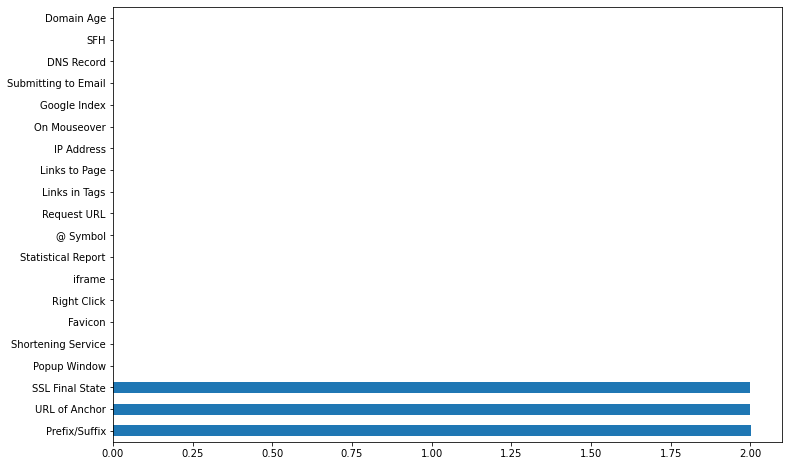

In [9]:
plt.figure(figsize=(12,8))
# Top 10 most important features
pd.Series(abs(clf.coef_[0]), index=dataset['X'].columns).nlargest(20).plot(kind='barh')

## Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0,max_iter=10000).fit(X_train, y_train)

In [11]:
#Training accuracy
train_pred = lr.predict(X_train).tolist()
same_train = sum(x == y for x, y in zip(train_pred, y_train.tolist()))
accuracy_train = round(same_train/ len(train_pred), 5)

#Test set accuracy
predictions = lr.predict(X_test).tolist()
same_test = sum(x == y for x, y in zip(predictions, y_test.tolist()))
accuracy_test = round(same_test / len(predictions), 5)

print("The accuracy of the model on the training set is: ", accuracy_train)
print("The accuracy of the model on the test set is: ", accuracy_test)

The accuracy of the model on the training set is:  0.93004
The accuracy of the model on the test set is:  0.92221


## Logistic Regression Feature Importance

<AxesSubplot:>

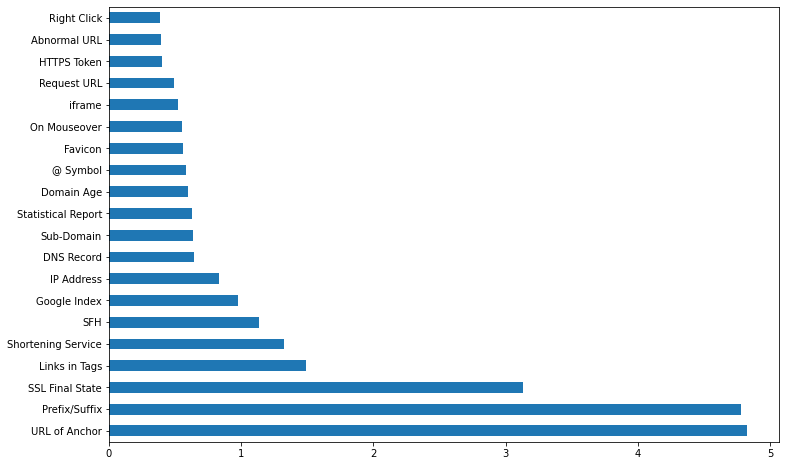

In [12]:
plt.figure(figsize=(12,8))
# Top 10 most important features
pd.Series(abs(lr.coef_[0]), index=dataset['X'].columns).nlargest(20).plot(kind='barh')

## Decision Tree

In [13]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)

In [14]:
#Training accuracy
train_pred = dtree.predict(X_train).tolist()
same_train = sum(x == y for x, y in zip(train_pred, y_train.tolist()))
accuracy_train = round(same_train/ len(train_pred), 5)

#Test set accuracy
predictions = dtree.predict(X_test).tolist()
same_test = sum(x == y for x, y in zip(predictions, y_test.tolist()))
accuracy_test = round(same_test / len(predictions), 5)

print("The accuracy of the model on the training set is: ", accuracy_train)
print("The accuracy of the model on the test set is: ", accuracy_test)

The accuracy of the model on the training set is:  0.97371
The accuracy of the model on the test set is:  0.94609


## Decision Tree Feature Importances

<AxesSubplot:>

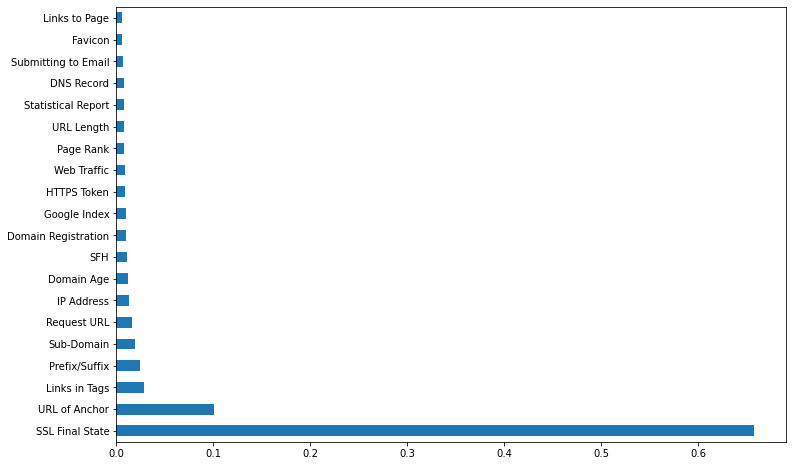

In [15]:
plt.figure(figsize=(12,8))
# Top 10 most important features
pd.Series(abs(dtree.feature_importances_), index=dataset['X'].columns).nlargest(20).plot(kind='barh')

## GAMs

In [16]:
from interpret.glassbox import ExplainableBoostingClassifier
from sklearn.model_selection import train_test_split

# create a train/test split
seed = 1
X_train, X_test, y_train, y_test = train_test_split(dataset['X'],dataset['y'], test_size=0.25, random_state=seed)

# train a GAM for the training dataset
ebm = ExplainableBoostingClassifier()

ebm.fit(X_train, y_train)

ExplainableBoostingClassifier(feature_names=['IP Address', 'URL Length',
                                             'Shortening Service', '@ Symbol',
                                             '// Redirect', 'Prefix/Suffix',
                                             'Sub-Domain', 'SSL Final State',
                                             'Domain Registration', 'Favicon',
                                             'Port', 'HTTPS Token',
                                             'Request URL', 'URL of Anchor',
                                             'Links in Tags', 'SFH',
                                             'Submitting to Email',
                                             'Abnormal URL', 'Redirect',
                                             'On Mouseover', 'Right Click',
                                             'Popup Window', 'iframe',...
                                             'categorical', 'categorical',
                                  

In [17]:
from interpret import show 

ebm_global = ebm.explain_global()
show(ebm_global)

C:\Users\mrcon\AppData\Roaming\Python\Python38\site-packages\interpret\visual\udash.py:5: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html
C:\Users\mrcon\AppData\Roaming\Python\Python38\site-packages\interpret\visual\udash.py:6: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\mrcon\AppData\Roaming\Python\Python38\site-packages\interpret\visual\udash.py:7: UserWarning: 
The dash_table package is deprecated. Please replace
`import dash_table` with `from dash import dash_table`

Also, if you're using any of the table format helpers (e.g. Group), replace 
`from dash_table.Format import Group` with 
`from dash.dash_table.Format import Group`
  import dash_table as dt


<!-- http://127.0.0.1:7520/2766132544272/ -->

In [18]:
incorrect_indices = [index for index, value in enumerate(zip(predictions, y_test.tolist())) if value[0] != value[1]]
test_indices = incorrect_indices[:20]

ebm_local = ebm.explain_local(X_test.iloc[test_indices, :], y_test.iloc[test_indices], name='EBM')
show(ebm_local)

<!-- http://127.0.0.1:7520/2766132660160/ -->